# Grad CAM exploration

We are modifying the lesson 1 notebook to see if we can implement [Grad-CAM](https://arxiv.org/abs/1610.02391). The idea is to obtain a heatmap of the important areas of the images for the classifier.

The objective is to eventually use this for the satellite project.

In [ ]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [1]:
from fastai import *
from fastai.vision import *
import re
import scipy.ndimage
%matplotlib inline

In [2]:
import fastai
fastai.__version__

'1.0.22'

## Setup
We start by doing the same as in lesson 1 to setup our model.

In [3]:
torch.cuda.set_device(0)

In [4]:
path = Path('/home/henripal/projects/maps/scraper/')

In [5]:
path_img = path/'img'

In [6]:
data = ImageDataBunch.from_csv(path_img, ds_tfms=get_transforms(), size=224, bs=64)
data.normalize(imagenet_stats)

In [7]:
learn = create_cnn(data, models.resnet50, metrics=error_rate)
learn.load('resnet50-big-finetuned-bs64')

ClassificationLearner(data=<fastai.vision.data.ImageDataBunch object at 0x7f1da9ef1278>, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        

In [8]:
data.c = 5

In [28]:
segmenter = Learner.create_unet(data, models.resnet50)

In [29]:
img = next(iter(data.train_dl))[0]
mask = segmenter.model(img)

RuntimeError: CUDA error: out of memory

In [ ]:
mask.shape

In [ ]:
mask_img = mask[0].cpu().detach().numpy()
mask_img = mask_img - np.min(mask_img)
mask_img = mask_img/np.max(mask_img)
mask_img = np.moveaxis(mask_img, 0, -1)

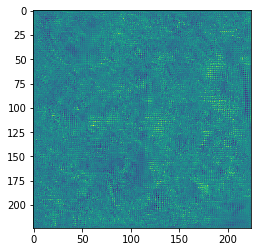

In [24]:
plt.imshow(mask_img[:, :, 3])

In [26]:
my_mask = open_mask(mask_img)

AttributeError: 'numpy.ndarray' object has no attribute 'read'